In [122]:
import random
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize
from scipy.interpolate import splrep
from scipy.interpolate import splev
from scipy.interpolate import lagrange

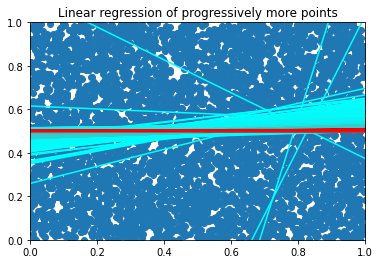

In [143]:

length = 5000

x_axis_variables = np.random.rand(length)
y_axis_variables = np.random.rand(length)

# Change the autoscale of the plot so it goes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Linear regression of progressively more points')

plt.scatter(x_axis_variables, y_axis_variables)

slopes = np.zeros(length - 1)
y_intercepts = np.zeros(length - 1)

for i in range(length - 1):
    m1, b1 = np.polyfit(x_axis_variables[0:i+2], y_axis_variables[0:i+2], 1) 
    plt.plot(np.array([0, 1]), m1*np.array([0, 1]) + b1, color=(i/length, 1-(i/length), 1-(i/length), 1))
    slopes[i] = m1
    y_intercepts[i] = b1
# The lines plotted earlier (i.e. with fewer data points) are light blue
# The lines plotted later (i.e. with more data points) are bright red


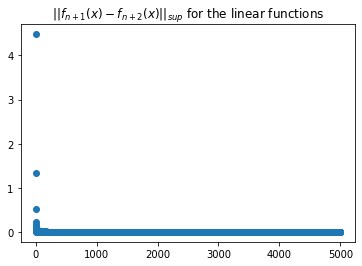

In [144]:
# need to go through the slopes and y-intercept arrays
sup_of_functions = np.zeros(length - 2)
for i in range(length - 2):
    f_0 = abs(y_intercepts[i] - y_intercepts[i+1])
    f_1 = abs(y_intercepts[i] + slopes[i] - (y_intercepts[i+1] + slopes[i+1]))
    sup_of_functions[i] = max(f_0, f_1)
plt.title("$||f_{n+1}(x) - f_{n+2}(x)||_{sup}$ for the linear functions")
plt.scatter(np.arange(start=1, stop=length-1, step=1), sup_of_functions)

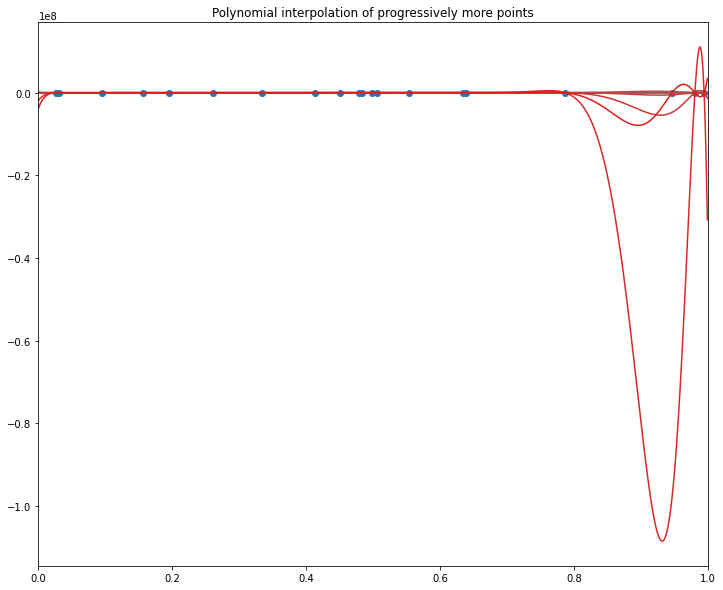

In [125]:
# Now to do the polynomial interpretation
functions = []
plt.figure(figsize=(12,10))
plt.xlim(0,1)
plt.scatter(x_axis_variables, y_axis_variables)
plt.title( 'Polynomial interpolation of progressively more points')

polynomial_functions = []


for i in range(length - 1):
    # Estimate the Lagrange Interpolation for the points we pass in
    lagrange_interpolation = lagrange(x_axis_variables[0:i+2], y_axis_variables[0:i+2])
    # Show the interpolated values
    plt.plot(np.arange(start=0, stop=1, step=.001), lagrange_interpolation(np.arange(start=0, stop=1, step=.001)), color=(i/length, 1-(i/length), 1-(i/length), 1))
    polynomial_functions.append(lagrange_interpolation)
# The lines plotted earlier (i.e. with fewer data points) are light blue
# The lines plotted later (i.e. with more data points) are bright red


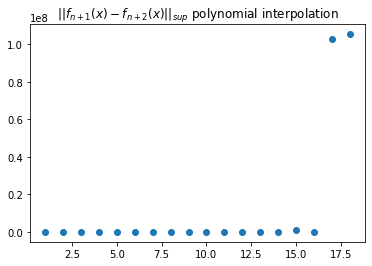

In [126]:
def compute_differences(listOfFunctions):
    listOfDifferences = []
    for i in range(len(listOfFunctions)-1):
        # create the function that is the difference between the ith and i+1th functions
        currentDifference = (listOfFunctions[i] - listOfFunctions[i+1])
        def f(x):
            return -max(abs(currentDifference(x)), abs(-currentDifference(x)))

        # optimize the distance between the two functions
        result = optimize.minimize_scalar(fun=f, bounds=(0, 1), method='bounded')

        # add the resulting difference between the two functions to a list
        listOfDifferences.append(abs(result.fun))
    return listOfDifferences

listDiff = compute_differences(polynomial_functions)
plt.title('$||f_{n+1}(x) - f_{n+2}(x)||_{sup}$ polynomial interpolation')
plt.scatter(np.arange(start=1, stop=length-1, step=1), listDiff)

In [127]:
# Conclusion: the polynomial interpretation is not stable but the linear regression interpretation is stable

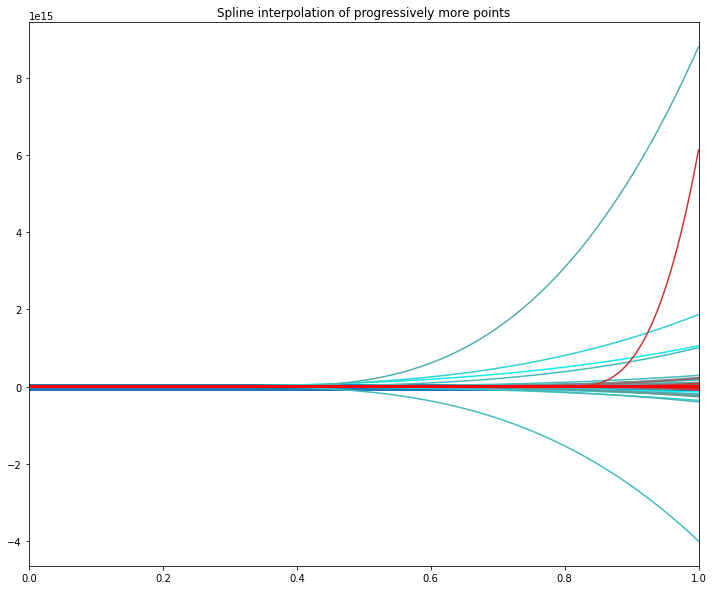

In [146]:
# Splines
plt.figure(figsize=(12,10))
plt.xlim(0,1)
plt.scatter(x_axis_variables, y_axis_variables)
plt.title( 'Spline interpolation of progressively more points')

# we need to put the points in order because that's what splrep expects
combined_variables = []
for i in range(len(x_axis_variables)):
    combined_variables.append((x_axis_variables[i], y_axis_variables[i]))
combined_variables.sort()

x_axis_variables = []
y_axis_variables = []

for j in range(len(combined_variables)):
    x_axis_variables.append(combined_variables[j][0])
    y_axis_variables.append(combined_variables[j][1])

newLength = length - 4
spline_functions = []
# TODO: replace .0001 with something better. 
xnew = np.arange(0, 1, 0.0001)


for j in range(length-4):
    spline_function = splrep(x=x_axis_variables[0:2+j], y=y_axis_variables[0:2+j], xb=0, xe=1, k=min(j+1, 3), s=0)
    spline_function_y = splev(xnew, spline_function, der=0)
    spline_functions.append(spline_function_y)
    plt.plot(xnew, spline_function_y, color=(j/newLength, 1-(j/newLength), 1-(j/newLength), 1))

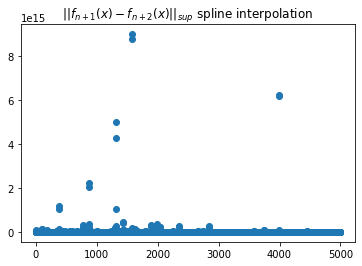

In [147]:
splineDiff = []
for i in range(len(spline_functions) - 1):
    arr1 = spline_functions[i]
    arr2 = spline_functions[i+1]
    differenceArray = []
    for i in range(len(arr1)):
        differenceArray.append(abs(arr1[i] - arr2[i]))
    splineDiff.append(max(differenceArray))

plt.title('$||f_{n+1}(x) - f_{n+2}(x)||_{sup}$ spline interpolation')
plt.scatter(np.arange(start=1, stop=length-4, step=1), splineDiff)

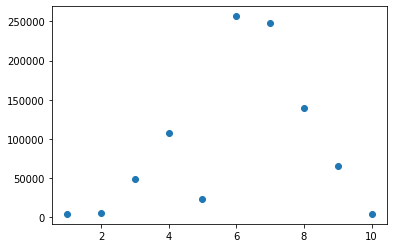

In [151]:
plt.scatter(np.arange(start=1, stop=11), splineDiff[4980:4990])